This project will explore two datasets with various data around loans, both those that have defaulted and those
that have not. The aim is to identify the correlations between risk factors and defaults, to explore the 
relationships among them, and to then provide recommendations to lenders on how to mitigate risks while staying 
within the legal fair lending parameters afforded to them in the United States. This analysis will not consider
state-level legislation in providing its recommendations.

Lines 1 - 14 are data wrangling and cleaning.

Lines 15 - 27 are Exploratory Data Analysis 

Lines 28 - X are data preprocessing

Lines X - X are modelling

Line X contains a brief summary of the findings, as well as recommendations to lenders which consider US federal fair
lending pracitices law.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data2 = pd.read_csv('Default2.csv')

df2 = pd.DataFrame(data2)

In [3]:
df2.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


We see fortunately that the two dataframes do not overlap in their data, aside from income and
whether they defaulted. This means we will get a wide variety of features to test when it comes time
to explore correlations.

In [4]:
#Since LoanID in df2 is useless, we will drop it. We will also need to see how many categorical datapoints exist
# in the Education column to see if there will be too many to feasibly use one hot encoding later.

df2.drop(columns=['LoanID'], inplace=True)
df2['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [5]:
df2.isna().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [6]:
df2.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [7]:
# It will be interesting to add another feature for later analysis: the ratio of the loan to the
# applicant's income in df2. This will likely be a similar, yet conceptually different ratio to their
# overall DTI ratio

df2['LoanToIncome'] = round(df2['LoanAmount']/df2['Income'], 2)

In [8]:
df2.tail()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,LoanToIncome
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0,5.55
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1,3.66
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0,2.46
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0,0.71
255346,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0,0.82


In [9]:
#Finally, given the size of df2, it will be useful to divide it into two dataframes to cut down
# on visualization and analysis time, one with all defaulted loans and one with all non-defaulted
#loans

defaulted = df2[df2['Default'] == 1]
paid = df2[df2['Default'] == 0]

In [10]:
#Let's look at the size now of each dataframe we'll work with

print('df2 has a shape of:', df2.shape)
print('Our Defaulted dataframe has a shape of:', defaulted.shape)
print('Our paid dataframe has a shape of:', paid.shape)

df2 has a shape of: (255347, 18)
Our Defaulted dataframe has a shape of: (29653, 18)
Our paid dataframe has a shape of: (225694, 18)


Now let's begin visualizing our data in our Exploratory Data Analysis

In [11]:
#Starting basic, let's investigate some descriptive statistics around those who default as compared
# To those who do not

print('The average age of lenders who default is ', round(defaulted['Age'].mean(), 2), ', whereas the average age among those who did not default is ', round(paid['Age'].mean(), 2))

The average age of lenders who default is  36.56 , whereas the average age among those who did not default is  44.41


In [12]:
print('The median income of lenders who default is', round(defaulted['Income'].median(), 2), ', whereas the median age among those who do not is', round(paid['Income'].median(), 2))

The median income of lenders who default is 66566.0 , whereas the median age among those who do not is 84237.5


In [13]:
print('The average credit score of lenders who default is', round(defaulted['CreditScore'].mean(), 2), ', whereas the average score among those who do not is', round(paid['CreditScore'].mean(), 2))

The average credit score of lenders who default is 559.29 , whereas the average score among those who do not is 576.23


In [14]:
print('The average Debt to Income ratio of those who defaulted is', round(defaulted['DTIRatio'].mean(), 4), 'wheras the average for those who did not is', round(paid['DTIRatio'].mean(), 4))

The average Debt to Income ratio of those who defaulted is 0.5125 wheras the average for those who did not is 0.4986


In [15]:
print('Finally, the average of the ratio between the loan and annual income for those who defaulted is', round(defaulted['LoanToIncome'].mean(), 4), 'whereas the average ratio for those who did not was', round(paid['LoanToIncome'].mean(), 4))

Finally, the average of the ratio between the loan and annual income for those who defaulted is 3.253 whereas the average ratio for those who did not was 2.0362


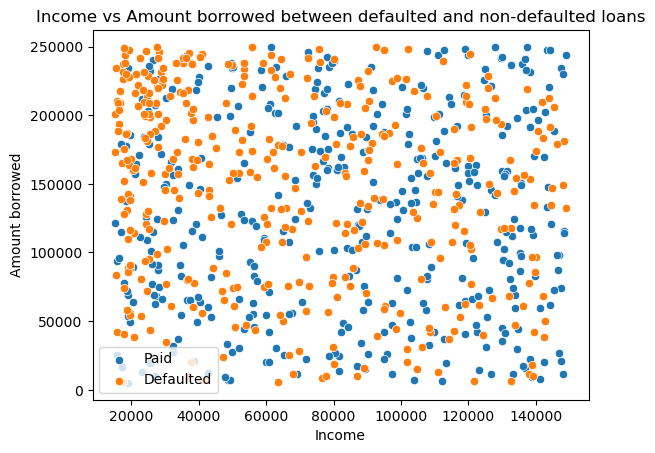

In [16]:
#Now let's graph some of these relationships to see if they're more striking than meets the eye with their averages.
# Defaulted however is too large to run efficiently, so we are going to take a sample of 2000 from each dataset to plot.

Spaid = paid.sample(n=400)
Sdefaulted = defaulted.sample(n=400)

sns.scatterplot(data=Spaid, x='Income', y='LoanAmount', label='Paid')
sns.scatterplot(data=Sdefaulted, x='Income', y='LoanAmount', label='Defaulted')

plt.title('Income vs Amount borrowed between defaulted and non-defaulted loans')
plt.xlabel('Income')
plt.ylabel('Amount borrowed')

plt.legend()
plt.show()

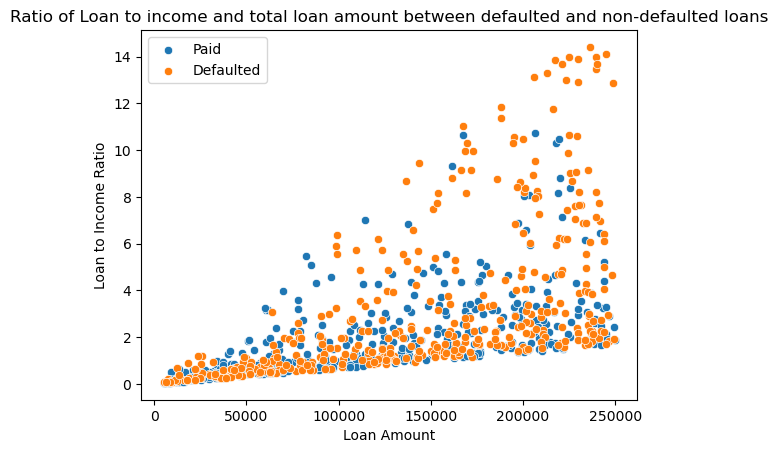

In [17]:
Spaid = paid.sample(n=400, random_state = 1)
Sdefaulted = defaulted.sample(n=400, random_state = 1)

sns.scatterplot(data=Spaid, x='LoanAmount', y='LoanToIncome', label='Paid')
sns.scatterplot(data=Sdefaulted, x='LoanAmount', y='LoanToIncome', label='Defaulted')

plt.title('Ratio of Loan to income and total loan amount between defaulted and non-defaulted loans')
plt.xlabel('Loan Amount')
plt.ylabel('Loan to Income Ratio')

plt.legend()
plt.show()

Above we see an interesting trend - while we didn't get much useful insight comparing income to amount borrowed, we do start to see somewhat of a trend emerge between the amount borrowed and the ratio of that loan to income. A significantly higher proportion of those with higher loan to income ratios defaulted when compared to those with lower loan to income ratios. Next we plot average lines in the same scatterplot to see how great the difference is between the two

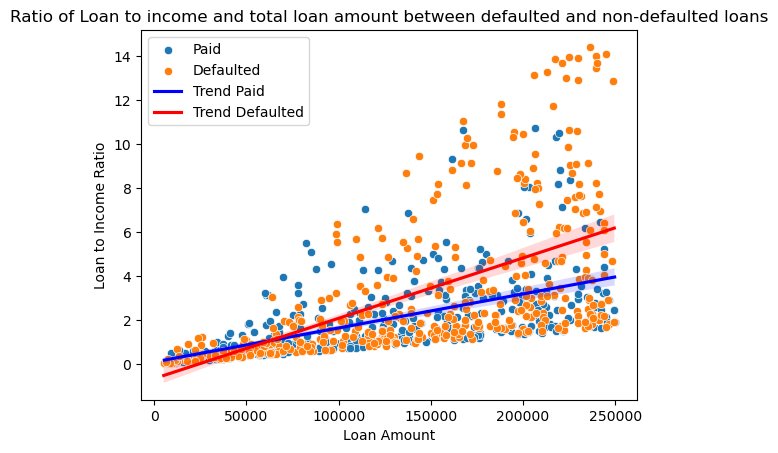

In [18]:
Spaid = paid.sample(n=400, random_state = 1)
Sdefaulted = defaulted.sample(n=400, random_state = 1)

sns.scatterplot(data=Spaid, x='LoanAmount', y='LoanToIncome', label='Paid')
sns.scatterplot(data=Sdefaulted, x='LoanAmount', y='LoanToIncome', label='Defaulted')

sns.regplot(data=Spaid, x='LoanAmount', y='LoanToIncome', scatter=False, color='blue', label='Trend Paid')
sns.regplot(data=Sdefaulted, x='LoanAmount', y='LoanToIncome', scatter=False, color='red', label='Trend Defaulted')

plt.title('Ratio of Loan to income and total loan amount between defaulted and non-defaulted loans')
plt.xlabel('Loan Amount')
plt.ylabel('Loan to Income Ratio')

plt.legend()
plt.show()

In [19]:
df2.drop(columns=['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasDependents', 'HasMortgage', 'HasCoSigner']).corr()['Default']

Age              -0.167783
Income           -0.099119
LoanAmount        0.086659
CreditScore      -0.034166
MonthsEmployed   -0.097374
NumCreditLines    0.028330
InterestRate      0.131273
LoanTerm          0.000545
DTIRatio          0.019236
Default           1.000000
LoanToIncome      0.178964
Name: Default, dtype: float64

In [20]:
paid.drop(columns=['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasDependents', 'HasMortgage', 'HasCoSigner']).corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,LoanToIncome
Age,1.000000,-0.015318,0.010386,-0.006388,-0.016822,0.003101,0.022480,0.001558,-0.001588,NaN,0.025701
Income,-0.015318,1.000000,0.025807,-0.003785,-0.004592,0.000210,0.008528,-0.001120,0.001422,NaN,-0.598853
LoanAmount,0.010386,0.025807,1.000000,0.003783,0.010413,-0.001463,-0.011789,0.003617,0.000615,NaN,0.560640
CreditScore,-0.006388,-0.003785,0.003783,1.000000,-0.002826,0.000262,0.004694,0.001799,-0.001401,NaN,0.004640
MonthsEmployed,-0.016822,-0.004592,0.010413,-0.002826,1.000000,0.004243,0.011990,-0.000550,0.003574,NaN,0.013160
NumCreditLines,0.003101,0.000210,-0.001463,0.000262,0.004243,1.000000,-0.003858,0.000490,-0.000911,NaN,-0.003396
InterestRate,0.022480,0.008528,-0.011789,0.004694,0.011990,-0.003858,1.000000,0.000399,-0.002270,NaN,-0.019879
LoanTerm,0.001558,-0.001120,0.003617,0.001799,-0.000550,0.000490,0.000399,1.000000,0.001620,NaN,0.002987
DTIRatio,-0.001588,0.001422,0.000615,-0.001401,0.003574,-0.000911,-0.002270,0.001620,1.000000,NaN,-0.000553
Default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
defaulted.drop(columns=['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasDependents', 'HasMortgage', 'HasCoSigner']).corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,LoanToIncome
Age,1.000000,-0.040700,0.030522,-0.006277,-0.018500,0.010603,0.012033,-0.009398,-0.000625,NaN,0.059411
Income,-0.040700,1.000000,-0.123785,-0.012474,-0.025033,0.004998,0.028398,0.000274,0.007205,NaN,-0.693825
LoanAmount,0.030522,-0.123785,1.000000,0.007789,0.018758,-0.003245,-0.030438,-0.006132,-0.009614,NaN,0.553571
CreditScore,-0.006277,-0.012474,0.007789,1.000000,-0.001970,0.006488,0.007154,-0.003799,0.007454,NaN,0.013297
MonthsEmployed,-0.018500,-0.025033,0.018758,-0.001970,1.000000,0.002522,0.021684,-0.005523,0.004298,NaN,0.032214
NumCreditLines,0.010603,0.004998,-0.003245,0.006488,0.002522,1.000000,-0.005600,-0.005787,-0.002822,NaN,-0.013949
InterestRate,0.012033,0.028398,-0.030438,0.007154,0.021684,-0.005600,1.000000,0.004238,0.000463,NaN,-0.051681
LoanTerm,-0.009398,0.000274,-0.006132,-0.003799,-0.005523,-0.005787,0.004238,1.000000,0.007191,NaN,-0.001763
DTIRatio,-0.000625,0.007205,-0.009614,0.007454,0.004298,-0.002822,0.000463,0.007191,1.000000,NaN,-0.014293
Default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


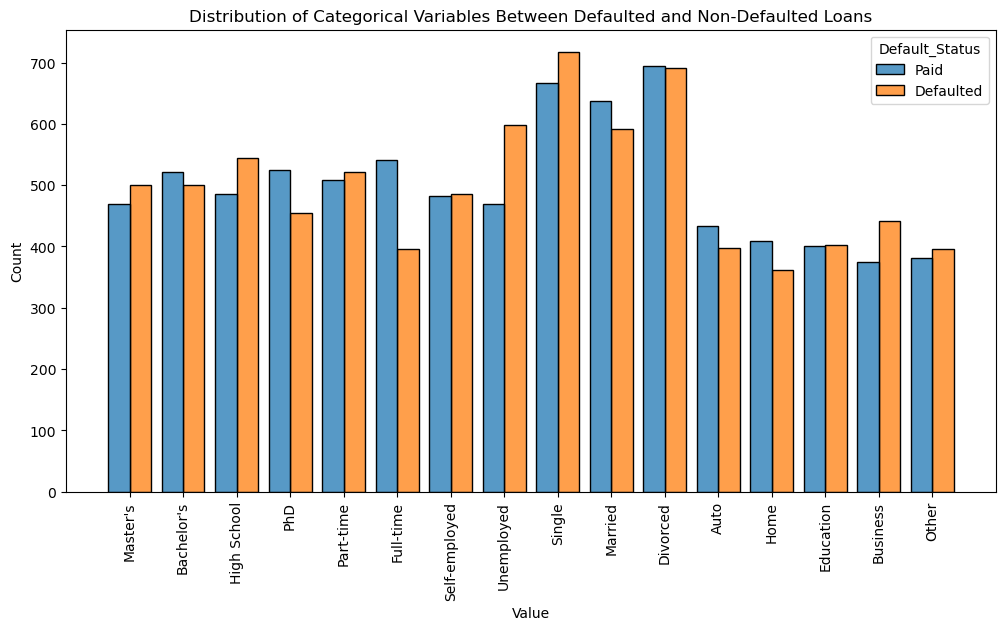

In [22]:
sampled_paid = paid.sample(n=2000, random_state=1)
sampled_defaulted = defaulted.sample(n=2000, random_state=1)

sampled_paid['Default_Status'] = 'Paid'
sampled_defaulted['Default_Status'] = 'Defaulted'

Sdf2 = pd.concat([sampled_paid, sampled_defaulted])

cols_to_drop = ['Age', 'Income', 'HasMortgage', 'Default', 'HasDependents', 'HasCoSigner', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'LoanToIncome']
Sdf2_cat = Sdf2.drop(columns=cols_to_drop)

Sdf2_melted = Sdf2_cat.melt(id_vars=['Default_Status'], var_name='Category', value_name='Value')
Sdf2_melted['Value'] = Sdf2_melted['Value'].astype(str)

plt.figure(figsize=(12, 6))
sns.histplot(data=Sdf2_melted, x='Value', hue='Default_Status', multiple='dodge', shrink=0.8)

plt.title('Distribution of Categorical Variables Between Defaulted and Non-Defaulted Loans')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

In [23]:
columns_of_interest = ['HasDependents', 'HasMortgage', 'HasCoSigner']

counts = {}

for col in columns_of_interest:
    num_yes_not_defaulted = Sdf2[(Sdf2[col] == 'Yes') & (Sdf2['Default'] == 0)].shape[0]
    num_no_not_defaulted = Sdf2[(Sdf2[col] == 'No') & (Sdf2['Default'] == 0)].shape[0]
    
    num_yes_defaulted = Sdf2[(Sdf2[col] == 'Yes') & (Sdf2['Default'] == 1)].shape[0]
    num_no_defaulted = Sdf2[(Sdf2[col] == 'No') & (Sdf2['Default'] == 1)].shape[0]
    
    counts[col] = {
        'Number of "yes" not defaulted': num_yes_not_defaulted,
        'Number of "no" not defaulted': num_no_not_defaulted,
        'Number of "yes" defaulted': num_yes_defaulted,
        'Number of "no" defaulted': num_no_defaulted
    }

for col, count in counts.items():
    print("Column '{}'".format(col))
    print("  {} 'yes' values did not default".format(count['Number of "yes" not defaulted']))
    print("  {} 'no' values did not default".format(count['Number of "no" not defaulted']))
    print("  {} 'yes' values defaulted".format(count['Number of "yes" defaulted']))
    print("  {} 'no' values defaulted".format(count['Number of "no" defaulted']))
    print()

Column 'HasDependents'
  984 'yes' values did not default
  1016 'no' values did not default
  958 'yes' values defaulted
  1042 'no' values defaulted

Column 'HasMortgage'
  1022 'yes' values did not default
  978 'no' values did not default
  924 'yes' values defaulted
  1076 'no' values defaulted

Column 'HasCoSigner'
  1043 'yes' values did not default
  957 'no' values did not default
  863 'yes' values defaulted
  1137 'no' values defaulted



So far we've seen slight trends in individual variables among those who have defaulted as opposed to those who
have not, but none seem to be particularly strongly correlated. Unsupervised learning will be a more powerful tool to help us explore the data, and we will want to mix classifier and regressor models to make actual predictions. Before any of this however, we will need to preprocess and scale our data for those models.

In [24]:
defaulted.shape

(29653, 18)

In [25]:
# We see several different scales of values here - from ratios ranging from 0-16, 
# to ages ranging from 18-80, to credit scores between 400-800 and then financial numbers between 40-250k.

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

In [26]:
#We need to scale and one hot encode our data. We will re-sample from our original data,
#significantly increasing the number of rows sampled. We will also split the train and test data for later.

categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
numerical_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

Spaid = paid.sample(n = 4000, random_state=1)
Sdefaulted = defaulted.sample(n=4000, random_state=1)
df3 = pd.concat([Spaid, Sdefaulted])


X = df3.drop(columns=['Default'])
y = df3['Default']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train_cat = X_train[categorical_features]
X_test_cat = X_test[categorical_features]

C:\Users\tnels\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


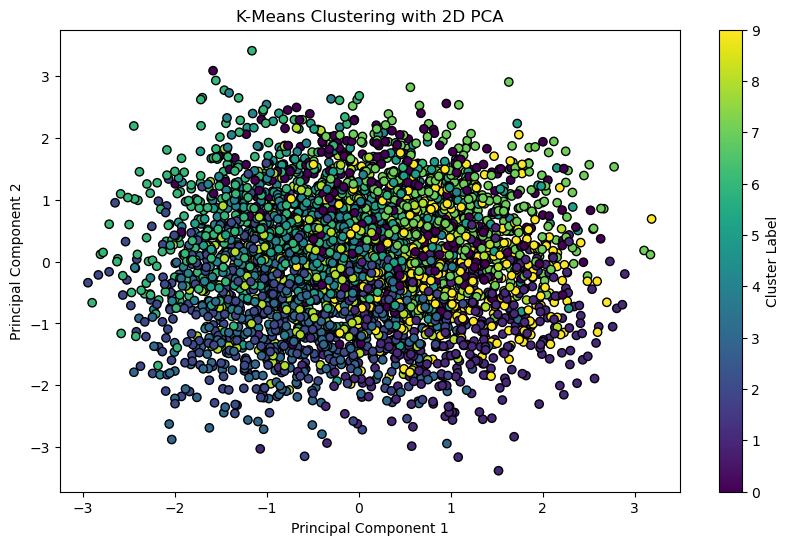

In [27]:
scaler = StandardScaler()
Sdefaulted_scaled = scaler.fit_transform(Sdefaulted[numerical_features])

kmeans = KMeans(n_clusters=10, random_state=1)
cluster_labels = kmeans.fit_predict(Sdefaulted_scaled)
pca = PCA(n_components=2)
Sdefaulted_pca = pca.fit_transform(Sdefaulted_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(Sdefaulted_pca[:, 0], Sdefaulted_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with 2D PCA')
plt.colorbar(label='Cluster Label')
plt.show()

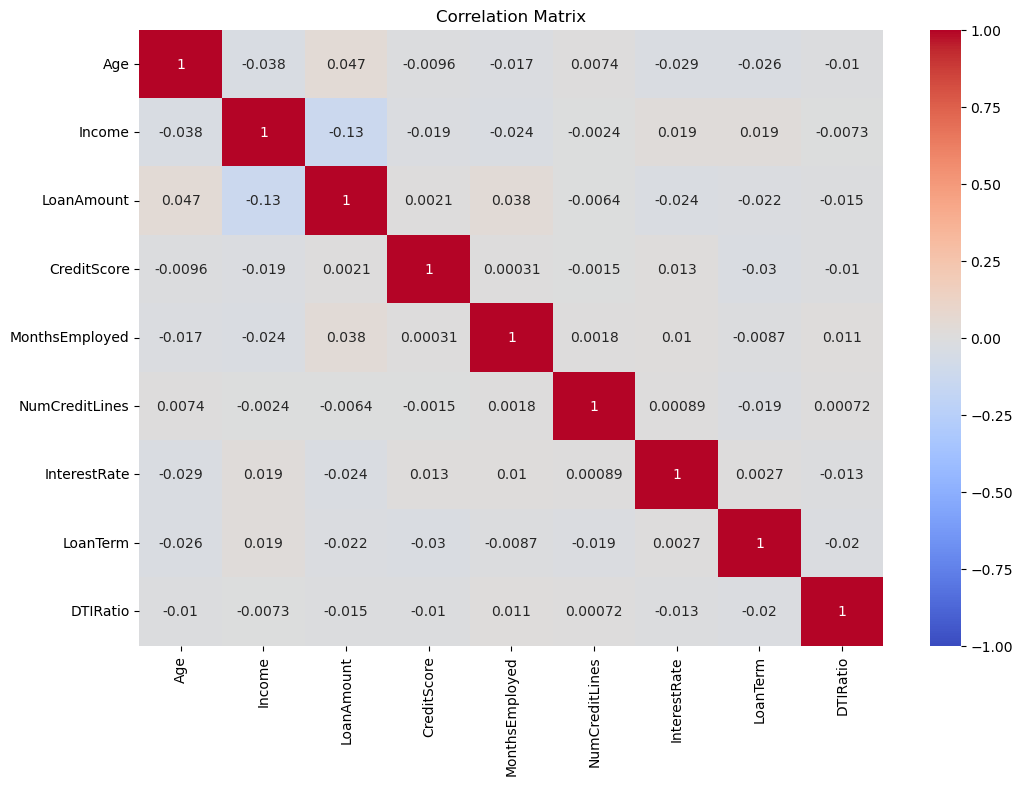

In [28]:
#Unfortunately, Kmeans does not seem to provide any useful insights. To look at a more specific
#correlation among variables, let's leverage heatmaps.
correlation_matrix = Sdefaulted[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

C:\Users\tnels\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


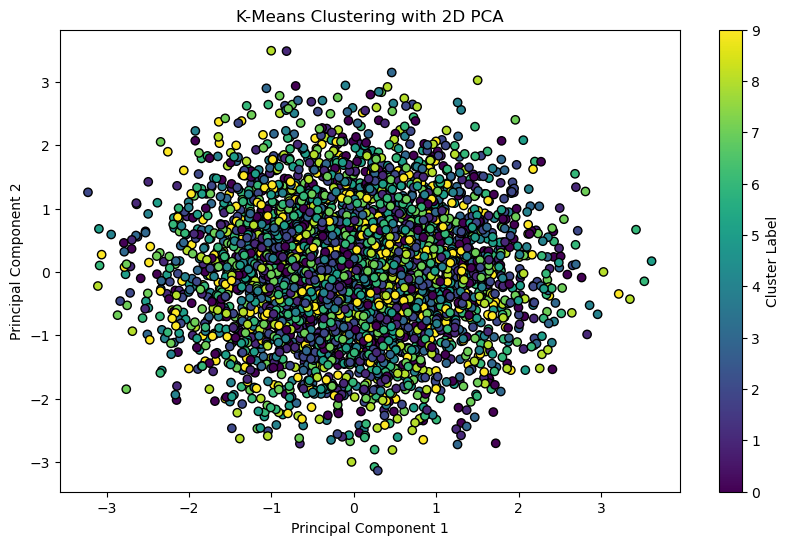

In [29]:
scaler = StandardScaler()
Spaid_scaled = scaler.fit_transform(Spaid[numerical_features])

kmeans = KMeans(n_clusters=10, random_state=1)
cluster_labels = kmeans.fit_predict(Sdefaulted_scaled)
pca = PCA(n_components=2)
Sdefaulted_pca = pca.fit_transform(Spaid_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(Sdefaulted_pca[:, 0], Sdefaulted_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with 2D PCA')
plt.colorbar(label='Cluster Label')
plt.show()

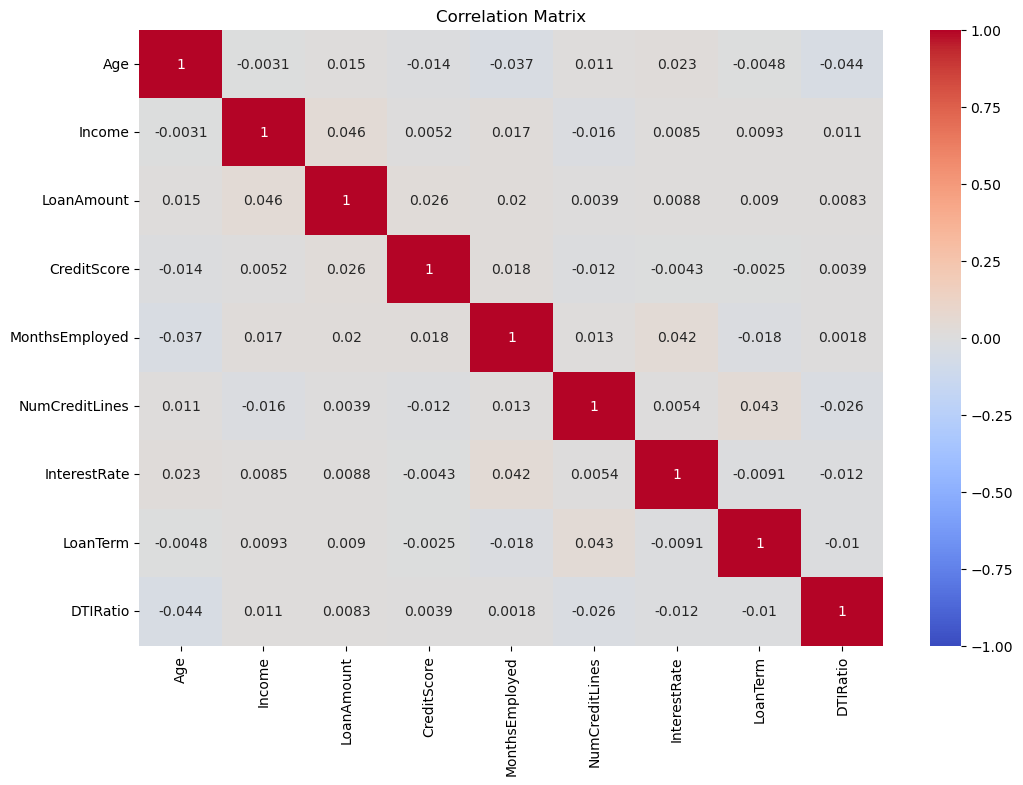

In [30]:
correlation_matrix = Spaid[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [31]:
#No luck on any useful insights with heat mapping, either. Let's look at classifiers, hoping that they
#will give us more actionable insights.

X_encoded = pd.get_dummies(X)
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=1)

scoring = ['accuracy', 'roc_auc']
cv_results = cross_validate(rf, X_encoded, y, cv=5, scoring=scoring)

accuracy_scores = cv_results['test_accuracy']
roc_auc_scores = cv_results['test_roc_auc']

print("Cross-validation accuracy scores:", accuracy_scores)
print("Mean cross-validation accuracy:", accuracy_scores.mean())

print("Cross-validation ROC AUC scores:", roc_auc_scores)
print("Mean cross-validation ROC AUC:", roc_auc_scores.mean())

Cross-validation accuracy scores: [0.649375 0.665625 0.64875  0.66     0.67    ]
Mean cross-validation accuracy: 0.6587500000000001
Cross-validation ROC AUC scores: [0.69474687 0.73098516 0.72146875 0.71533594 0.74417969]
Mean cross-validation ROC AUC: 0.72134328125


In [ ]:
#Much more encouraging. Let's tweak hyperparameters until we find an optimal set, then try another classifier to compare.
rf = RandomForestClassifier(n_estimators=125, min_samples_split = 5, min_samples_leaf = 15, random_state=1)

scoring = ['accuracy', 'roc_auc']
cv_results = cross_validate(rf, X_encoded, y, cv=5, scoring=scoring)

accuracy_scores = cv_results['test_accuracy']
roc_auc_scores = cv_results['test_roc_auc']

print("Cross-validation accuracy scores:", accuracy_scores)
print("Mean cross-validation accuracy:", accuracy_scores.mean())

print("Cross-validation ROC AUC scores:", roc_auc_scores)
print("Mean cross-validation ROC AUC:", roc_auc_scores.mean())

In [37]:
rf = RandomForestClassifier(n_estimators=125, min_samples_split = 5, min_samples_leaf = 15, random_state=1)

scoring = ['accuracy', 'roc_auc']
cv_results = cross_validate(rf, X_encoded, y, cv=5, scoring=scoring)

accuracy_scores = cv_results['test_accuracy']
roc_auc_scores = cv_results['test_roc_auc']

print("Cross-validation accuracy scores:", accuracy_scores)
print("Mean cross-validation accuracy:", accuracy_scores.mean())

print("Cross-validation ROC AUC scores:", roc_auc_scores)
print("Mean cross-validation ROC AUC:", roc_auc_scores.mean())

Cross-validation accuracy scores: [0.6475   0.674375 0.65875  0.676875 0.6875  ]
Mean cross-validation accuracy: 0.6689999999999999
Cross-validation ROC AUC scores: [0.70521094 0.73873281 0.74099531 0.73258437 0.75439219]
Mean cross-validation ROC AUC: 0.7343831249999999


In [38]:
# The best a Random Forest seems to be able to give us is a .73 ROC. Let's try an ADA Boost Classifier.
ada = AdaBoostClassifier(n_estimators=50, random_state=1)
ada.fit(X_train_encoded, y_train)
y_pred = ada.predict(X_test_encoded)
y_prob = ada.predict_proba(X_test_encoded)[:, 1]


print("Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       773
           1       0.69      0.64      0.66       827

    accuracy                           0.66      1600
   macro avg       0.66      0.66      0.66      1600
weighted avg       0.66      0.66      0.66      1600

ROC AUC Score: 0.7396292026386306


In [39]:
ada = AdaBoostClassifier(n_estimators=25, random_state=1)
ada.fit(X_train_encoded, y_train)
y_pred = ada.predict(X_test_encoded)
y_prob = ada.predict_proba(X_test_encoded)[:, 1]


print("Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       773
           1       0.68      0.64      0.66       827

    accuracy                           0.66      1600
   macro avg       0.66      0.66      0.66      1600
weighted avg       0.66      0.66      0.66      1600

ROC AUC Score: 0.7366093565952468


In [40]:
ada = AdaBoostClassifier(learning_rate=0.50, n_estimators=25, random_state=1)
ada.fit(X_train_encoded, y_train)
y_pred = ada.predict(X_test_encoded)
y_prob = ada.predict_proba(X_test_encoded)[:, 1]


print("Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       773
           1       0.72      0.65      0.68       827

    accuracy                           0.68      1600
   macro avg       0.69      0.69      0.68      1600
weighted avg       0.69      0.68      0.68      1600

ROC AUC Score: 0.7453497812351882


In [41]:
ada = AdaBoostClassifier(learning_rate=0.50, n_estimators=25, random_state=1)
ada.fit(X_train_encoded, y_train)
y_pred = ada.predict(X_test_encoded)
y_prob = ada.predict_proba(X_test_encoded)[:, 1]


print("Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       773
           1       0.72      0.65      0.68       827

    accuracy                           0.68      1600
   macro avg       0.69      0.69      0.68      1600
weighted avg       0.69      0.68      0.68      1600

ROC AUC Score: 0.7453497812351882


In [42]:
ada = AdaBoostClassifier(learning_rate=0.50, n_estimators=50, random_state=1)
ada.fit(X_train_encoded, y_train)
y_pred = ada.predict(X_test_encoded)
y_prob = ada.predict_proba(X_test_encoded)[:, 1]


print("Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       773
           1       0.71      0.65      0.68       827

    accuracy                           0.68      1600
   macro avg       0.68      0.68      0.68      1600
weighted avg       0.68      0.68      0.68      1600

ROC AUC Score: 0.7522662532791257


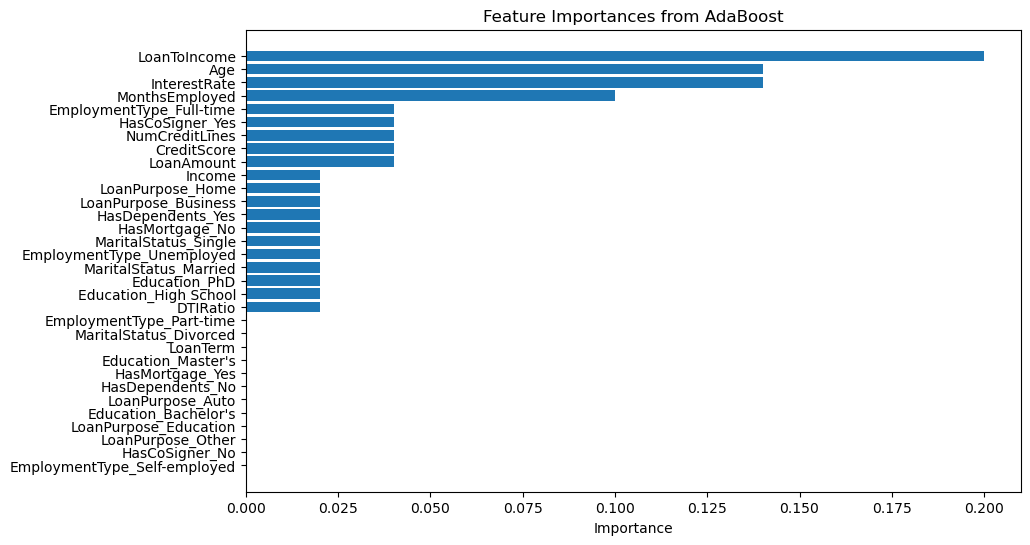

In [43]:
# 75% is slightly, but noticably better. Now we will look at the weights each of the features carry within the models, 
#to determine if  judging by the more important factors to ensure we remain in compliance with federal lending laws if 
#we consider them in the loan approval process

optimized_rf = RandomForestClassifier(n_estimators=125, min_samples_split = 5, min_samples_leaf = 15, random_state=1)
optimized_ada = AdaBoostClassifier(learning_rate=0.50, n_estimators=50, random_state=1)

optimized_rf.fit(X_encoded, y)
optimized_ada.fit(X_encoded, y)

feature_importances = optimized_ada.feature_importances_
feature_names = X_encoded.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from AdaBoost')
plt.gca().invert_yaxis()
plt.show()

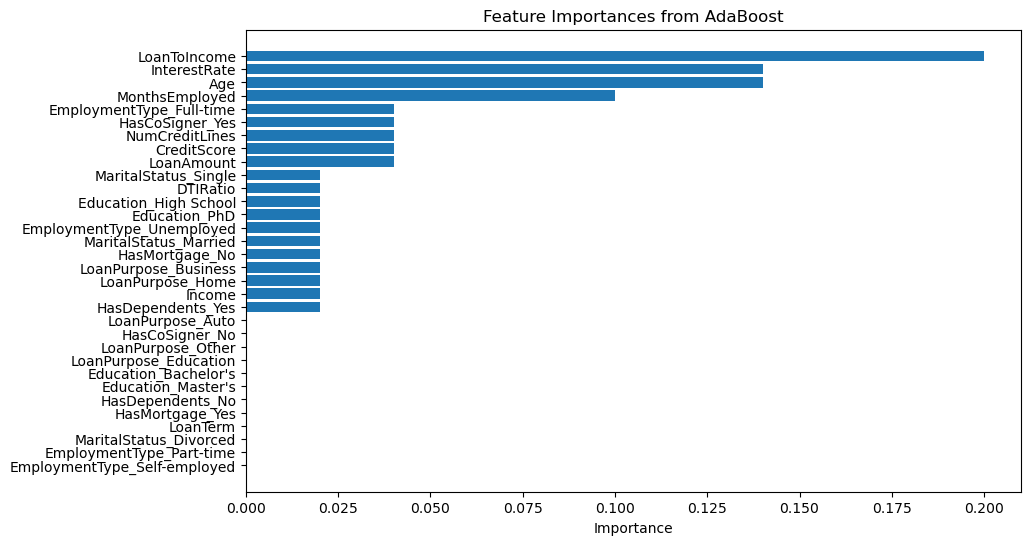

In [44]:
feature_importances2 = optimized_rf.feature_importances_
feature_names = X_encoded.columns

importance_df2 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df2 = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df2['Feature'], importance_df2['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from AdaBoost')
plt.gca().invert_yaxis()
plt.show()

While most of these factors don't pose a significant risk of being considered discriminatory, Age and marital
status are both prohibited in US federal law for usage in approving or denying loans. The Equal Credit Opportunity Act (ECOA) prohibits marital status from being used as a determining factor for loan approval, and the Fair Housing Act (FHA) includes home loans under those prohibited from using age as a determinant factor. Marital status has a small impact on either of the above models' predictive output, so with ROC scores at 75% we are safe to drop the criteria without much concern. However, age accounts for a much greater influence on the model's predictive power, so we will need to tweak our existing models for use in home loans to make them as accurate as possible without including age or marital status.

In [45]:
dfhome = df2.drop(columns=['MaritalStatus', 'Age'])
dfhomesplityes = dfhome[dfhome['Default'] == 1]
dfhomesplitno = dfhome[dfhome['Default'] == 0]

dfyes = dfhomesplityes.sample(n=4000, random_state=1)
dfno = dfhomesplitno.sample(n=4000, random_state=1)

dfhome= pd.concat([dfyes, dfno])

Xhome = dfhome.drop(columns=['Default'])
yhome = dfhome['Default']

Xhome_encoded = pd.get_dummies(Xhome)

rf = RandomForestClassifier(n_estimators=125, min_samples_split = 5, min_samples_leaf = 15, random_state=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(Xhome_encoded, yhome, test_size=.2, random_state = 1)

scoring = ['accuracy', 'roc_auc']
cv_results = cross_validate(rf, Xhome_encoded, y, cv=5, scoring=scoring)

accuracy_scores = cv_results['test_accuracy']
roc_auc_scores = cv_results['test_roc_auc']

print("Cross-validation accuracy scores:", accuracy_scores)
print("Mean cross-validation accuracy:", accuracy_scores.mean())

print("Cross-validation ROC AUC scores:", roc_auc_scores)
print("Mean cross-validation ROC AUC:", roc_auc_scores.mean())

Cross-validation accuracy scores: [0.615625 0.641875 0.65125  0.62125  0.645   ]
Mean cross-validation accuracy: 0.635
Cross-validation ROC AUC scores: [0.65609219 0.69872187 0.71319687 0.67132031 0.70202344]
Mean cross-validation ROC AUC: 0.6882709374999999


In [46]:
rf = RandomForestClassifier(n_estimators=125, min_samples_split = 5, min_samples_leaf = 20, random_state=1)

scoring = ['accuracy', 'roc_auc']
cv_results = cross_validate(rf, Xhome_encoded, y, cv=5, scoring=scoring)

accuracy_scores = cv_results['test_accuracy']
roc_auc_scores = cv_results['test_roc_auc']

print("Cross-validation accuracy scores:", accuracy_scores)
print("Mean cross-validation accuracy:", accuracy_scores.mean())

print("Cross-validation ROC AUC scores:", roc_auc_scores)
print("Mean cross-validation ROC AUC:", roc_auc_scores.mean())

Cross-validation accuracy scores: [0.610625 0.635625 0.6575   0.625625 0.643125]
Mean cross-validation accuracy: 0.6345
Cross-validation ROC AUC scores: [0.65808438 0.70002813 0.71590469 0.67387813 0.69955312]
Mean cross-validation ROC AUC: 0.6894896875


In [47]:
ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=50, random_state=1)
ada.fit(Xtrain, ytrain)
y_pred = ada.predict(Xtest)
y_prob = ada.predict_proba(Xtest)[:, 1]


print("Classification Report:")
print(classification_report(ytest, y_pred))
roc_auc = roc_auc_score(ytest, y_prob)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       827
           1       0.61      0.59      0.60       773

    accuracy                           0.62      1600
   macro avg       0.62      0.62      0.62      1600
weighted avg       0.62      0.62      0.62      1600

ROC AUC Score: 0.6805619213134961


In [48]:
ada = AdaBoostClassifier(learning_rate=0.87, n_estimators=50, random_state=1)
ada.fit(Xtrain, ytrain)
y_pred = ada.predict(Xtest)
y_prob = ada.predict_proba(Xtest)[:, 1]


print("Classification Report:")
print(classification_report(ytest, y_pred))
roc_auc = roc_auc_score(ytest, y_prob)
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       827
           1       0.61      0.58      0.59       773

    accuracy                           0.62      1600
   macro avg       0.62      0.62      0.62      1600
weighted avg       0.62      0.62      0.62      1600

ROC AUC Score: 0.6824914629319959


Here we have a final model which is optimized for predicting outcomes without utilizing age or marital status. It does not differ much from our earlier models, and as expected it has a slightly inferior performance. There is, however a takeaway which will be valuable.

The model taking age into account is approximately 66% accurate in predicting paying loan applicants, and 71% accurate at predicting defaults. The model which does not take age into account is approximately 62% accurate at predicting paying loans, and 61% accurate at predicting defaults. This difference will be very important for lenders to follow, as they have no obligation not to consider age as a risk factor unless it is a home loan, but will run afoul of the FHA if they use it in those cases.

For non-home loans, we should consider that if we approve 100 loans and all are predicted to pay, we can expect to have 34 defaults. If we reject 100 loans that we consider to be at high risk of defaulting, we will reject 29 loans which would have paid. Therefore it would make sense, rather than strictly approving loans on the basis of the model, to have a loan portfolio requirement that 70 loans out of 100 be approved by the algorithm, with the remaining 30 up to the discretion of the lender's representatives.

For home loans, the challenge is greater. Each prediction has a roughly 60% chance of accuracy, which is better than a coin flip but is not terribly reassuring. A separate approval process then should be used for home loans, in which 50% of the loans must be predicted to pay, with the remaining 50 being up to the lender.

There is additional utility to this model however, in addition to portfolio requirements. The model doesn't simply give likelihoods on a loan-by-loan basis, rather it gives us categories to begin our evaluation with which are exponentially greater indicators of the success of a loan than any other individual factor. In other words, the model doesn't just give us the likelihoods of payment or default on a portfolio of 100 loans, it creates that portfolio for evaluation to begin with.

Taking our predictive abilities with home loans to illustrate, we have a 61% chance of a loan being paid as predicted, or a 0.61 correlation between the algorithm's output and a paid loan. The next closest indicator we have by correlation is .044 between DTI ratio and age, or a 4% chance of accurately predicting payment by itself. 

Therefore, while the model's role will not be to make decisions for people, it should be leveraged as a powerful tool in the approval process, and should influence the way lenders look at each applicant. 

Finally, the other aim of our analysis is to look at individual factors which most influence the loan, looking inside the model. The feature giving us the greatest insight seems to be the ratio between the loan amount and the annual salary of the applicant, with age and interest rate a distant but significant second. Also useful is the number of months employed in their current role. On the other side of that equation, features such as loan term, employment type, purpose of the loan and co-signers seem to have no bearing at all on the payment or default of a loan.